In [ ]:

!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -qr requirements.txt
%pip install -q roboflow

import torch
import os
from IPython.display import Image  ,clear_output
# print(f"setup compleated.using torch{torch.__version__}({torch.cuda.get_device_properties(0).name})")

Cloning into 'yolov5'...
remote: Enumerating objects: 15829, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 15829 (delta 21), reused 31 (delta 10), pack-reused 15768
Receiving objects: 100% (15829/15829), 14.65 MiB | 7.42 MiB/s, done.
Resolving deltas: 100% (10833/10833), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 605.1/605.1 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 4.5 MB/s eta 0:

In [ ]:
os.environ["DATASET_DIRECTORY"]='/content/datsets'

In [ ]:
%pip install -q roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="U1VfUTM4bq7vx6Tp3xY4")
project = rf.workspace("iit-bombay-ouq3u").project("cvfordriverless")
dataset = project.version(2).download("yolov5")



loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to /content/datsets/cvfordriverless-2 in yolov5pytorch:: 100%|██████████| 144/144 [00:00<00:00, 1771.97it/s]


In [ ]:
!python train.py --img 416 --batch 16 --epochs 100 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

WARNING ⚠️ 'ultralytics.yolo.v8' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.models.yolo' instead.
WARNING ⚠️ 'ultralytics.yolo.utils' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.utils' instead.
Note this warning may be related to loading older models. You can update your model to current structure with:
    import torch
    ckpt = torch.load("model.pt")  # applies to both official and custom models
    torch.save(ckpt, "updated-model.pt")

train: weights=yolov5s.pt, cfg=, data=/content/datsets/cvfordriverless-2/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smooth

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.2 --source {dataset.location}/valid/images

WARNING ⚠️ 'ultralytics.yolo.v8' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.models.yolo' instead.
WARNING ⚠️ 'ultralytics.yolo.utils' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.utils' instead.
Note this warning may be related to loading older models. You can update your model to current structure with:
    import torch
    ckpt = torch.load("model.pt")  # applies to both official and custom models
    torch.save(ckpt, "updated-model.pt")

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/datsets/cvfordriverless-2/valid/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.2, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=

In [ ]:
import glob
from IPython.display import Image, display

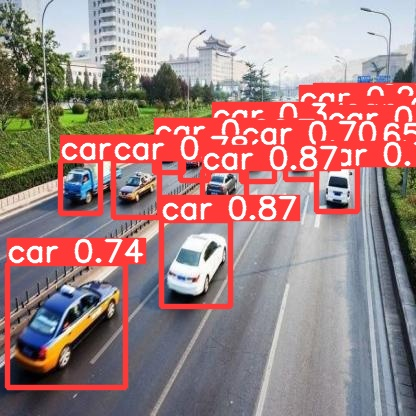

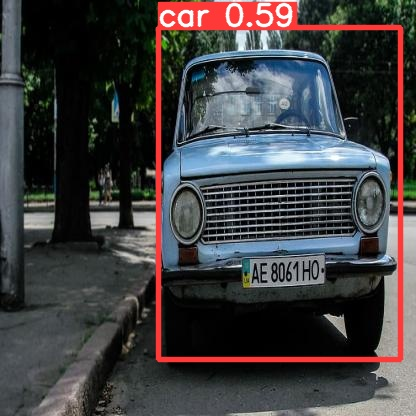

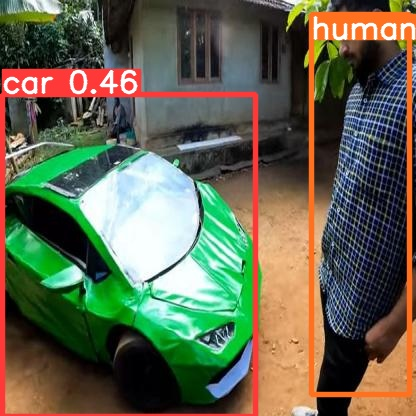

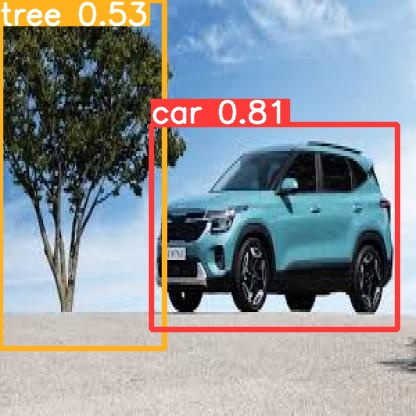

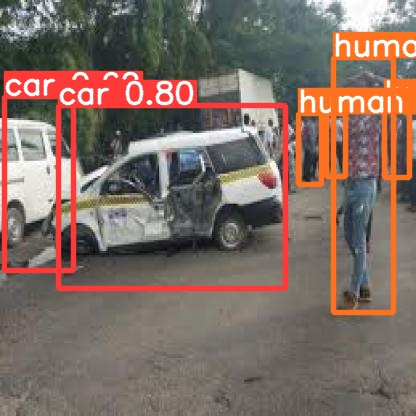

In [ ]:

i=0
for imageName in glob.glob("runs/detect/exp/*.jpg"):
  i+=1
  display(Image(filename=imageName))


In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.2 --source {dataset.location}/test/images

WARNING ⚠️ 'ultralytics.yolo.v8' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.models.yolo' instead.
WARNING ⚠️ 'ultralytics.yolo.utils' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.utils' instead.
Note this warning may be related to loading older models. You can update your model to current structure with:
    import torch
    ckpt = torch.load("model.pt")  # applies to both official and custom models
    torch.save(ckpt, "updated-model.pt")

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/datsets/cvfordriverless-2/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.2, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=F

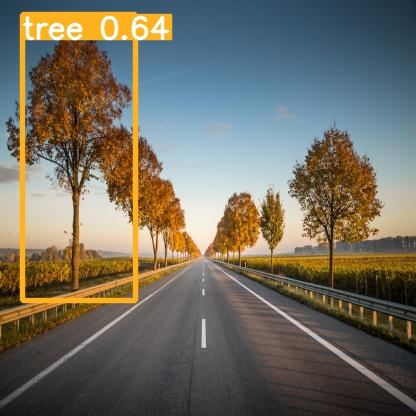

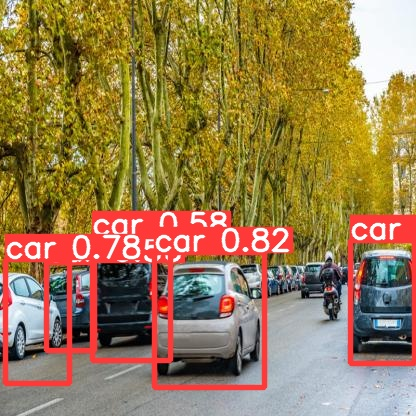

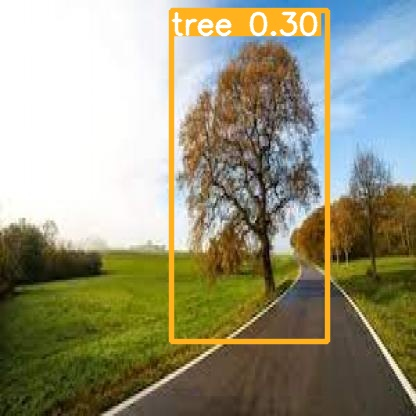

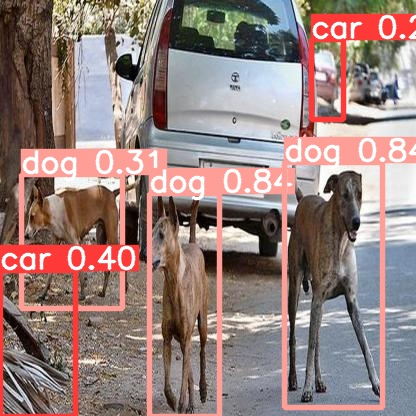

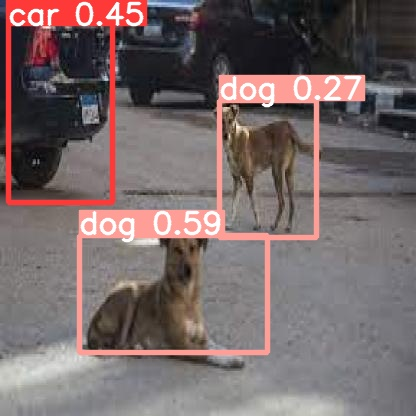

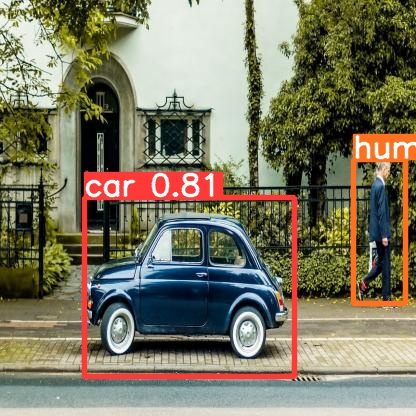

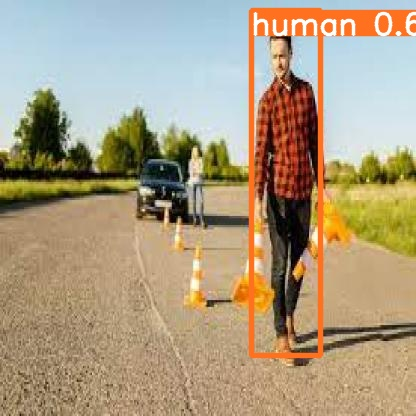

In [ ]:
i=0
for imageName in glob.glob("runs/detect/exp2/*.jpg"):
  i+=1
  display(Image(filename=imageName))